In [45]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
from Historic_Crypto import HistoricalData
import seaborn as sns
import warnings

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels 

warnings.filterwarnings("ignore")

In [2]:
data = HistoricalData('BTC-USD',21600,'2020-06-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-06-01T00:00:00
Provisional End: 2020-08-15T00:00:00
Data for chunk 1 of 19 extracted
Provisional Start: 2020-08-15T00:00:00
Provisional End: 2020-10-29T00:00:00
Data for chunk 2 of 19 extracted
Provisional Start: 2020-10-29T00:00:00
Provisional End: 2021-01-12T00:00:00
Data for chunk 3 of 19 extracted
Provisional Start: 2021-01-12T00:00:00
Provisional End: 2021-03-28T00:00:00
Data for chunk 4 of 19 extracted
Provisional Start: 2021-03-28T00:00:00
Provisional End: 2021-06-11T00:00:00
Data for chunk 5 of 19 extracted
Provisional Start: 2021-06-11T00:00:00
Provisional End: 2021-08-25T00:00:00
Data for chunk 6 of 19 extracted
Provisional Start: 2021-08-25T00:00:00
Provisional End: 2021-11-08T00:00:00
Data for chunk 7 of 19 ext

In [3]:
data

,low,high,open,close,volume
time,,,,,
2020-06-01 06:00:00,9507.48,9577.70,9531.69,9508.63,863.875400
2020-06-01 12:00:00,9490.00,9613.00,9508.32,9578.58,2717.712449
2020-06-01 18:00:00,9557.26,10428.00,9577.78,10208.96,15919.420102
2020-06-02 00:00:00,10037.60,10237.60,10208.96,10084.29,10264.431236
2020-06-02 06:00:00,10079.39,10148.00,10082.88,10104.84,2103.115456
...,...,...,...,...,...
2024-03-09 12:00:00,68163.94,68687.94,68453.45,68313.06,2448.706365
2024-03-09 18:00:00,68277.28,68598.37,68316.00,68480.00,1944.672333
2024-03-10 00:00:00,68367.30,69790.45,68480.01,69469.88,3688.195849


In [4]:
data.index

DatetimeIndex(['2020-06-01 06:00:00', '2020-06-01 12:00:00',
               '2020-06-01 18:00:00', '2020-06-02 00:00:00',
               '2020-06-02 06:00:00', '2020-06-02 12:00:00',
               '2020-06-02 18:00:00', '2020-06-03 00:00:00',
               '2020-06-03 06:00:00', '2020-06-03 12:00:00',
               ...
               '2024-03-08 06:00:00', '2024-03-08 12:00:00',
               '2024-03-08 18:00:00', '2024-03-09 00:00:00',
               '2024-03-09 06:00:00', '2024-03-09 12:00:00',
               '2024-03-09 18:00:00', '2024-03-10 00:00:00',
               '2024-03-10 06:00:00', '2024-03-10 12:00:00'],
              dtype='datetime64[ns]', name='time', length=5514, freq=None)

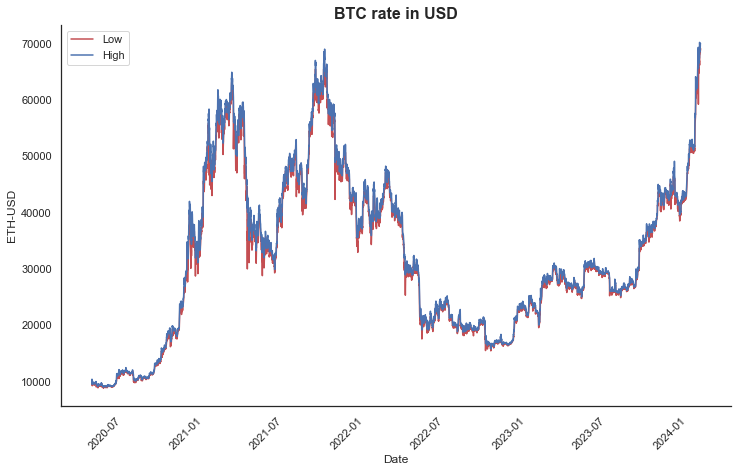

In [5]:
sns.set()
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['low'], color = 'r', label='Low')
plt.plot(data['high'], color = 'b', label='High')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('ETH-USD')
plt.title('BTC rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.show()

# Volatility Analysis

In [6]:
np.std(data)

low       14175.062558
high      14612.203447
open      14403.397814
close     14408.998406
volume     3802.454562
dtype: float64

In [7]:
years = ['2020','2021','2022','2023']
std_vals = []
for year in years:
    std_vals.append(np.std(data[year+'-01-01':year+'-12-31']['close']))

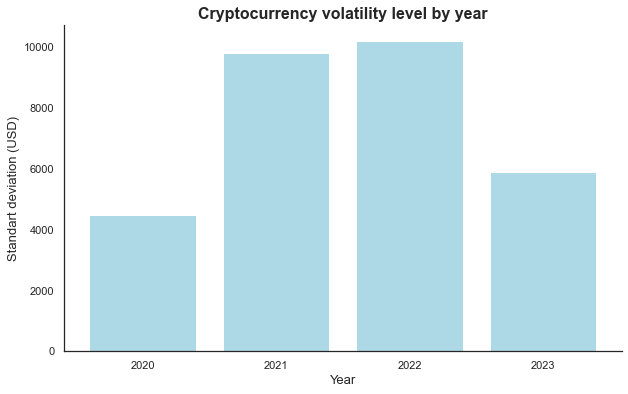

In [8]:
plt.figure(figsize = (10,6))
plt.bar(years, std_vals, color = 'lightblue')
plt.title("Сryptocurrency volatility level by year",fontsize = 16, fontweight = "bold")
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Standart deviation (USD)', fontsize = 13)
sns.despine()
plt.show()

In [9]:
date_range = pd.date_range(start=data.index[0], end=data.index[-1], freq='MS')
std_vals_m = [np.std(data['close'][date : date + pd.offsets.MonthBegin(1)]) for date in date_range]
y_m = [date for date in date_range]

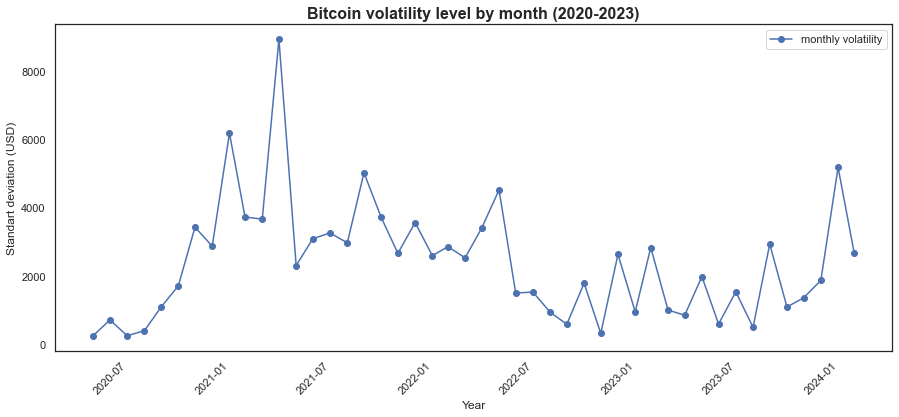

In [10]:
plt.figure(figsize=(15,6))
plt.plot(y_m,std_vals_m,marker='o',label='monthly volatility')
plt.xticks(rotation = 45)
plt.legend()
plt.title("Bitcoin volatility level by month (2020-2023)",fontsize = 16, fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Standart deviation (USD)')
plt.show()

According to volatility analysis, Bitcoin experienced periods of high volatility in 2021-2022. Several factors could contributed to the significant rise in cryptocurrency volatility during this period.
 1) Increased Institutional Interest. In 2021, there was a notable increase in institutional interest in cryptocurrencies. More institutional investors and corporations started to allocate funds to Bitcoin and other digital assets, influencing market dynamics.  
 
 2) Market Sentiment and Speculation. Cryptocurrency markets are highly sensitive to market sentiment and speculative trading. News, social media trends, and public perception can drive rapid and unpredictable price changes.  
 
 3) Regulatory Developments: Regulatory announcements and changes can have a significant impact on Bitcoin prices. Clarity or uncertainty regarding regulatory frameworks in different countries can influence investor confidence and market behavior.  
 
 4) NFT Boom. The rise of Non-Fungible Tokens (NFTs) in 2021 contributed to increased activity in the cryptocurrency space. NFT-related projects and the associated hype led to significant price movements

# Bitcoin volatility level - Rolling method

For smoothing transitions between points in a dataset we can use rolling method. By applying a moving window over the data, each point is replaced with a local statistic (such as mean or standard deviation) calculated within that window. This process helps to reduce noise and highlight trends, resulting in a smoother representation of the underlying pattern in the data.

In [11]:
def calculate_rolling_volatility(data, window):
    # Sorting DataFrame by DateTimeIndex
    data = data.sort_index()
    # Calculating rolling standard deviation (volatility) on the "close" column
    volatility = data['close'].rolling(window=window, min_periods=1).std()
    return volatility

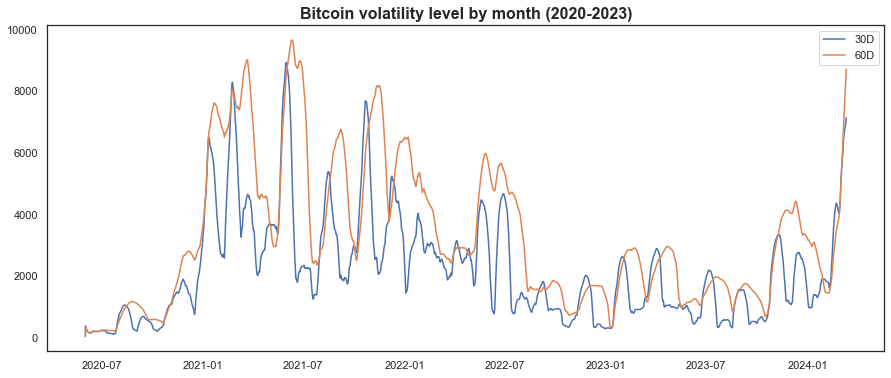

In [12]:
plt.figure(figsize=(15,6))
plt.plot(calculate_rolling_volatility(data,window='30D'),label='30D')
plt.plot(calculate_rolling_volatility(data,window='60D'),label='60D')
plt.legend()
plt.title("Bitcoin volatility level by month (2020-2023)",fontsize = 16, fontweight = "bold")
plt.show()

# Correlation analysis of trading volumes 

In the analysis below we will observe correlations beetween Bitcon and Etherium prices in USD using Pearson, Spearman and .

In [13]:
data_eth = HistoricalData('ETH-USD',21600,'2020-06-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-06-01T00:00:00
Provisional End: 2020-08-15T00:00:00
Data for chunk 1 of 19 extracted
Provisional Start: 2020-08-15T00:00:00
Provisional End: 2020-10-29T00:00:00
Data for chunk 2 of 19 extracted
Provisional Start: 2020-10-29T00:00:00
Provisional End: 2021-01-12T00:00:00
Data for chunk 3 of 19 extracted
Provisional Start: 2021-01-12T00:00:00
Provisional End: 2021-03-28T00:00:00
Data for chunk 4 of 19 extracted
Provisional Start: 2021-03-28T00:00:00
Provisional End: 2021-06-11T00:00:00
Data for chunk 5 of 19 extracted
Provisional Start: 2021-06-11T00:00:00
Provisional End: 2021-08-25T00:00:00
Data for chunk 6 of 19 extracted
Provisional Start: 2021-08-25T00:00:00
Provisional End: 2021-11-08T00:00:00
Data for chunk 7 of 19 ext

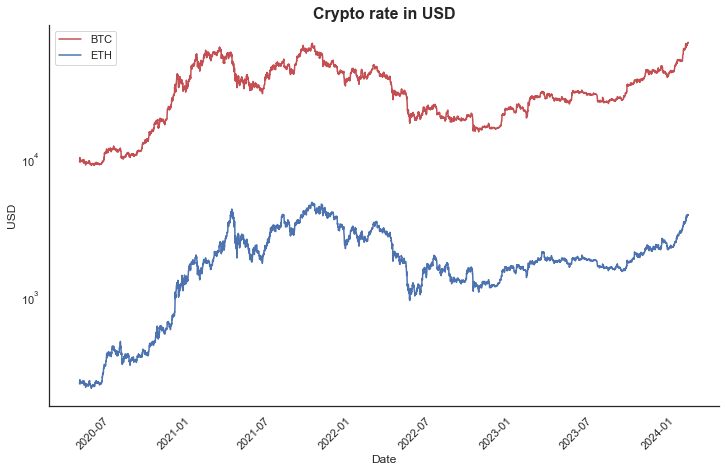

In [14]:
plt.figure(figsize = (12,7))
sns.set_style("white")
plt.plot(data['close'], color = 'r', label='BTC')
plt.plot(data_eth['close'],color = 'b', label='ETH')
sns.despine()
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Crypto rate in USD', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.yscale('log')
plt.show()

In [15]:
merged_data = pd.merge(data, data_eth, on='time', suffixes=('_btc', '_eth'))
btc_columns = ['volume_btc']
eth_columns = ['volume_eth']

# Pearson method

Measures the linear relationship between the volumes of sales for BTC and ETH. It assumes a linear association between the variables.

In [16]:
correlation_matrix = merged_data[btc_columns + eth_columns].corr(method = 'pearson')

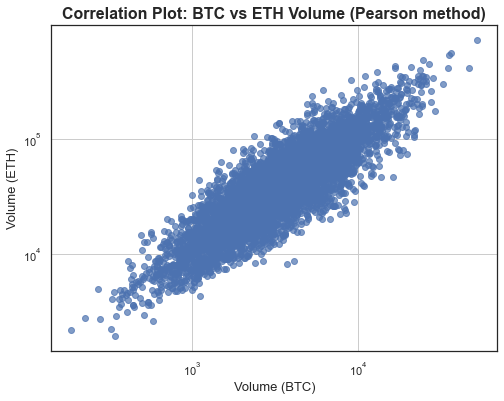

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['volume_btc'], merged_data['volume_eth'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation Plot: BTC vs ETH Volume (Pearson method)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Volume (BTC)', fontsize = 13)
plt.ylabel('Volume (ETH)', fontsize = 13)
plt.grid(True)
plt.show()

## Spearman method

In [18]:
btc_data = merged_data[btc_columns]
eth_data = merged_data[eth_columns]
spearman_corr, p_value = spearmanr(btc_data, eth_data)
spearman_corr

0.8470452912833535

In [19]:
 p_value

0.0

<AxesSubplot:xlabel='volume_btc', ylabel='volume_eth'>

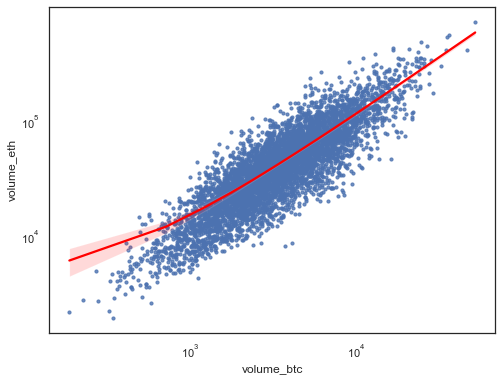

In [20]:
plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.yscale('log')
sns.regplot(x=btc_data.squeeze(), y=eth_data.squeeze(), scatter_kws={'s': 10}, line_kws={'color': 'red'})

From the plot above, we can notice an interesting observation: the Spearman regression line shows uncertainty in the beginning, possibly due to the low and diffuse trading volumes for both cryptocurrencies.

There is a positive correlation between BTC and ETH volume, an increase in the BTC trade volume leads to an increase in the ETH trade volume. Apparent non-linearity towards low volumes is due to the log-scale, the red line corresponds to a linear fit to data. 

# Predicting Bitcoin prices using the Gaussian Processes regression method

In [37]:
X = ((data.index.astype('int64') - data.index.astype('int64')[0]) // 10**9).values.reshape(-1, 1)
y = data['close'].values

# Normalization
X = (X - np.mean(X))/np.std(X)
y = (y - np.mean(y))/np.std(y)

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=70, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
#print(X_train, y_train)

In [39]:
kernel = 1 * kernels.RationalQuadratic(length_scale=1, length_scale_bounds=(2e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

2.05**2 * RationalQuadratic(alpha=0.0128, length_scale=0.0465)

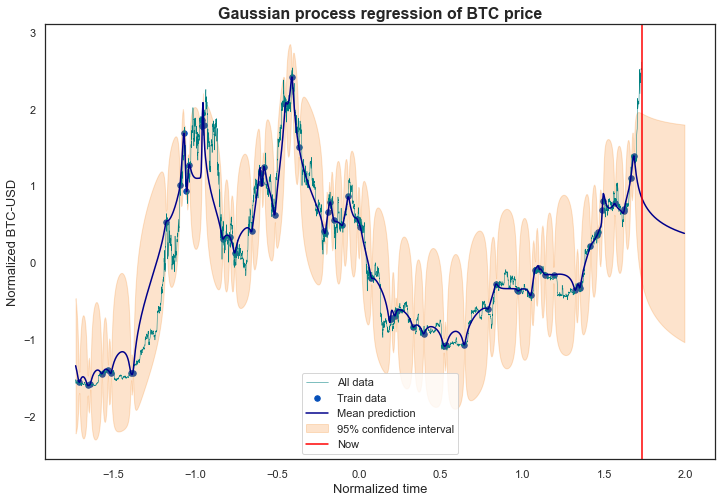

In [43]:
X_now = np.max(X)
X_new = np.linspace(np.min(X),X_now*1.15,1000).reshape(-1,1)
mean_prediction, std_prediction = gaussian_process.predict(X_new, return_std=True)

plt.figure(figsize = (12,8))
plt.plot(X, y, label=r"All data", linestyle="-",color='teal',lw=0.5)
plt.scatter(X_train, y_train, label="Train data",s=30,color='#054fb9')
plt.plot(X_new, mean_prediction, label="Mean prediction",color="darkblue")
plt.fill_between(
    X_new.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.2,
    label=r"95% confidence interval",
    color="#f57600"
)
plt.axvline(X_now,color='red',label='Now')
plt.legend()
plt.xlabel("Normalized time", fontsize = 13)
plt.ylabel("Normalized BTC-USD", fontsize = 13)
plt.title("Gaussian process regression of BTC price", fontsize = 16, fontweight = 'bold')
plt.show()